In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

automobile_df=pd.read_csv("automobile.csv", delimiter=";")


In [4]:
automobile_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [5]:
df_data = automobile_df.replace('?',np.NAN) 
df_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [22]:
df_temp = automobile_df[automobile_df['normalized-losses']!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
automobile_df['normalized-losses'] = automobile_df['normalized-losses'].replace('?',normalised_mean).astype(int)

df_temp = automobile_df[automobile_df['price']!='?']
normalised_mean = df_temp['price'].astype(int).mean()
automobile_df['price'] = automobile_df['price'].replace('?',normalised_mean).astype(int)

df_temp = automobile_df[automobile_df['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
automobile_df['horsepower'] = automobile_df['horsepower'].replace('?',normalised_mean).astype(int)

df_temp = automobile_df[automobile_df['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].replace('?',normalised_mean).astype(int)

df_temp =automobile_df[automobile_df['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
automobile_df['bore'] = automobile_df['bore'].replace('?',normalised_mean).astype(float)

df_temp = automobile_df[automobile_df['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
automobile_df['stroke'] = automobile_df['stroke'].replace('?',normalised_mean).astype(float)


automobile_df['num-of-doors'] = automobile_df['num-of-doors'].replace('?','four')
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [23]:
automobile_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [24]:
# get the number of missing data points per column
missing_values_count = automobile_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
dtype: int64

In [25]:
# Number of total missing values we have:
total_cells = np.product(automobile_df.shape)
total_missing = missing_values_count.sum()

# Number of data that is missing
(total_missing/total_cells) * 100


0.0

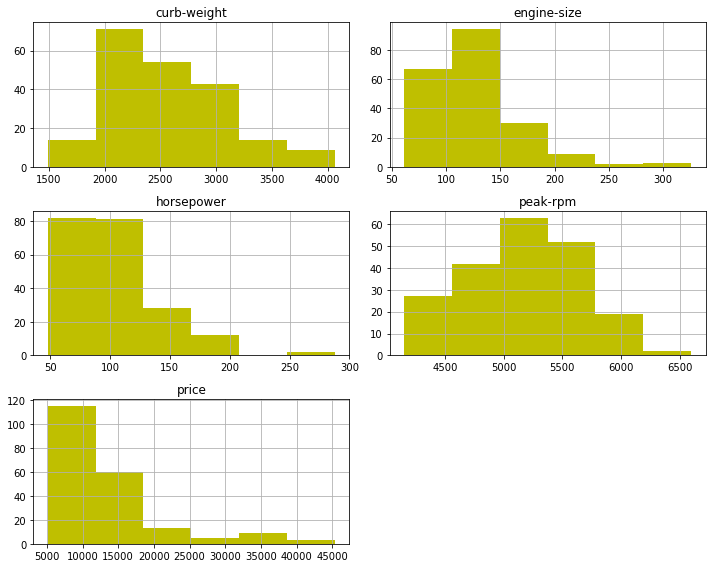

In [26]:
# 1 plt.figure(figsize=(10,8))
automobile_df[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='Y')
# 2 plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

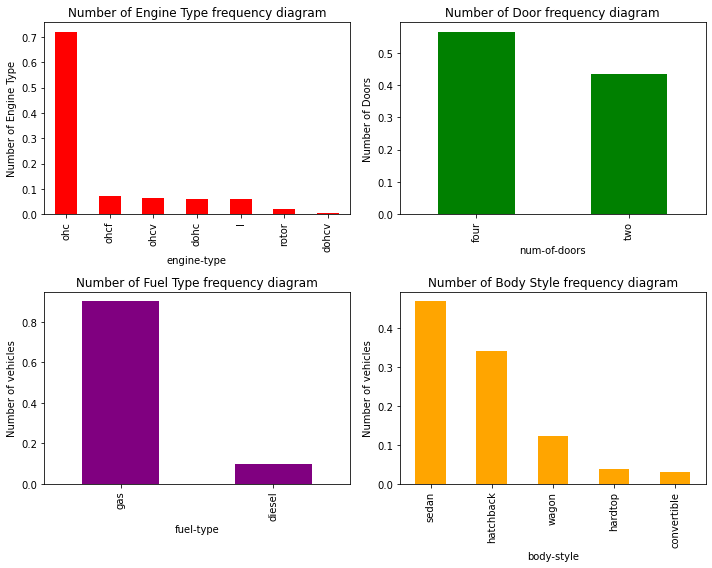

In [27]:
plt.figure(1)
plt.subplot(221)
automobile_df['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
automobile_df['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
automobile_df['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
automobile_df['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

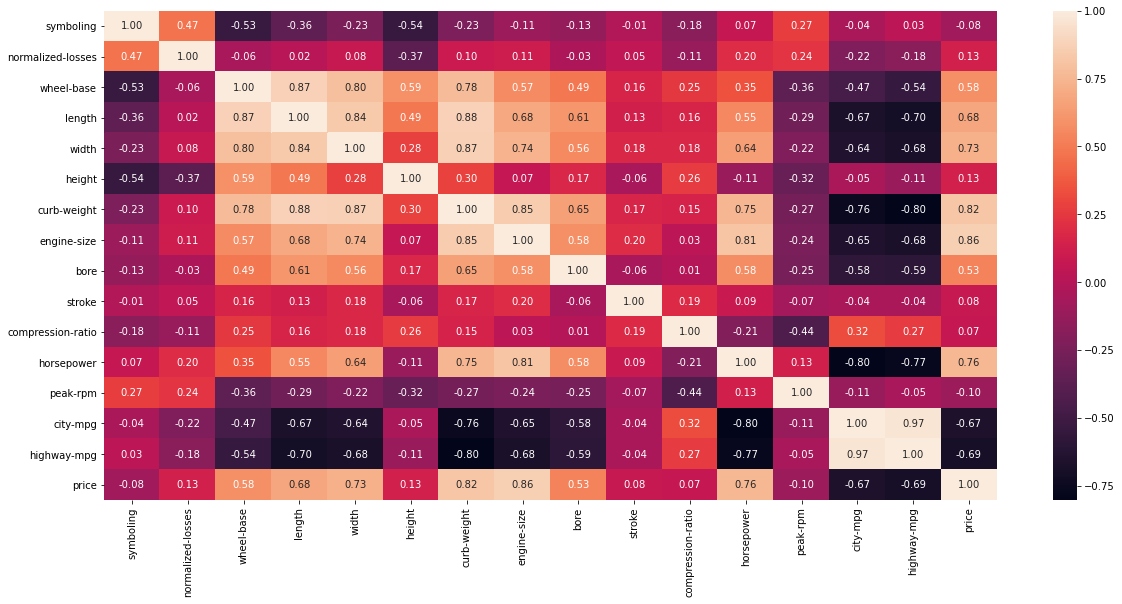

In [28]:
import seaborn as sns
corr = automobile_df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

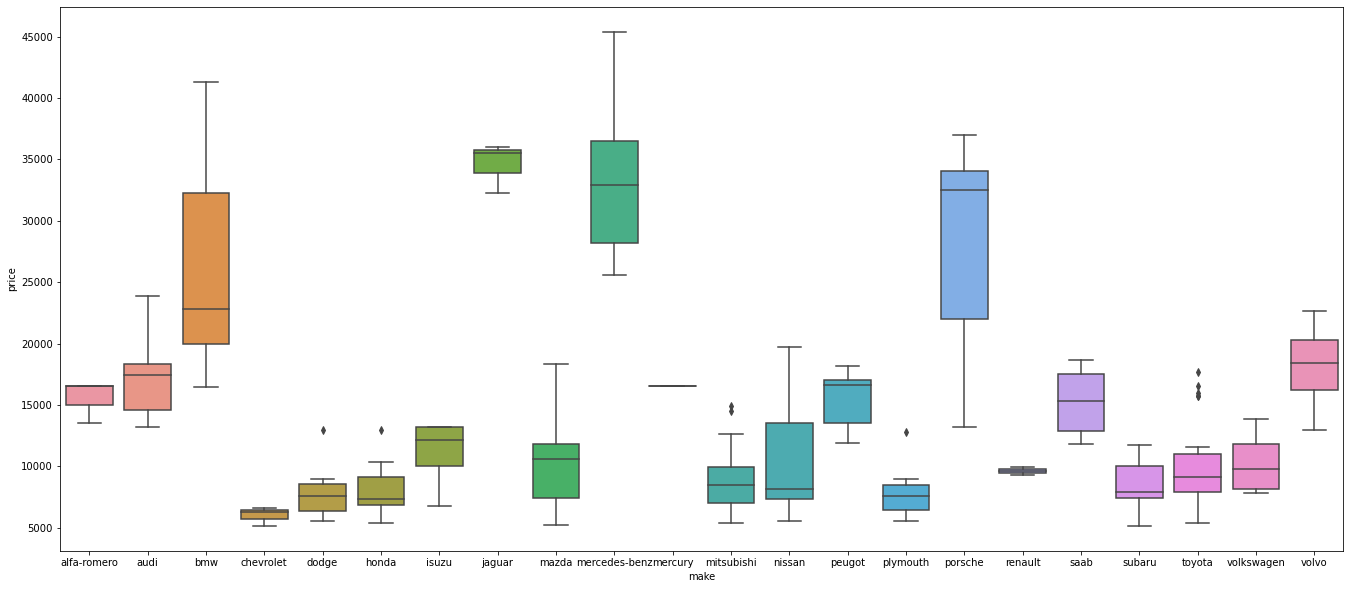

In [31]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=automobile_df)

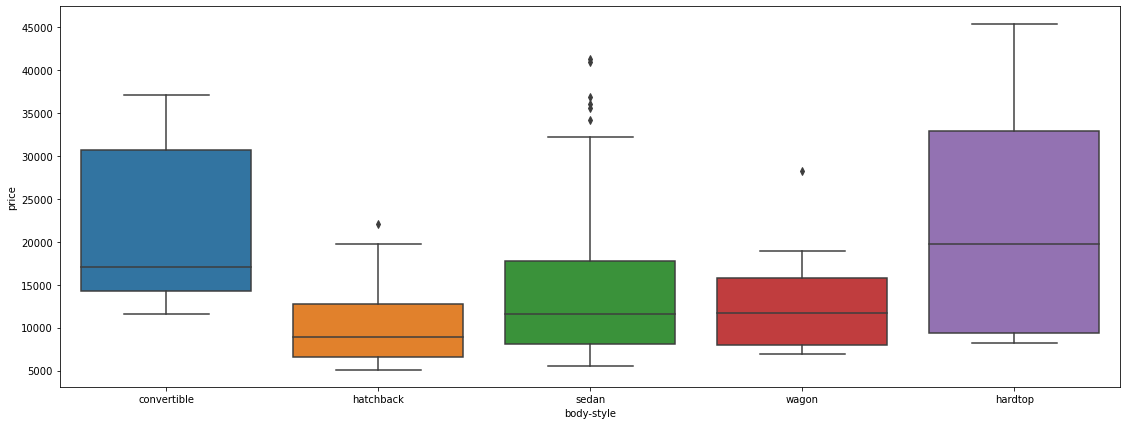

In [32]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=automobile_df)

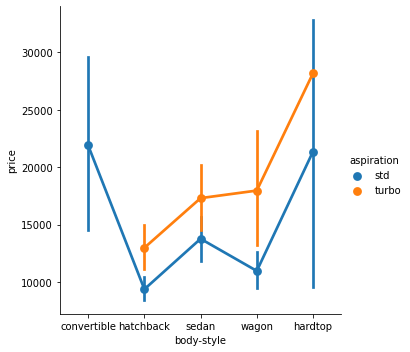

In [33]:
sns.catplot(data=automobile_df, x="body-style", y="price", hue="aspiration" ,kind="point")

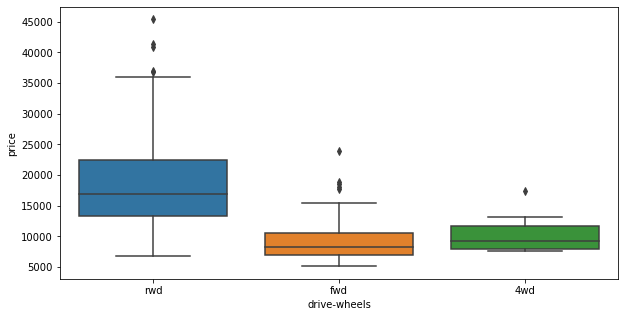

In [35]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile_df)

c:\users\woot\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


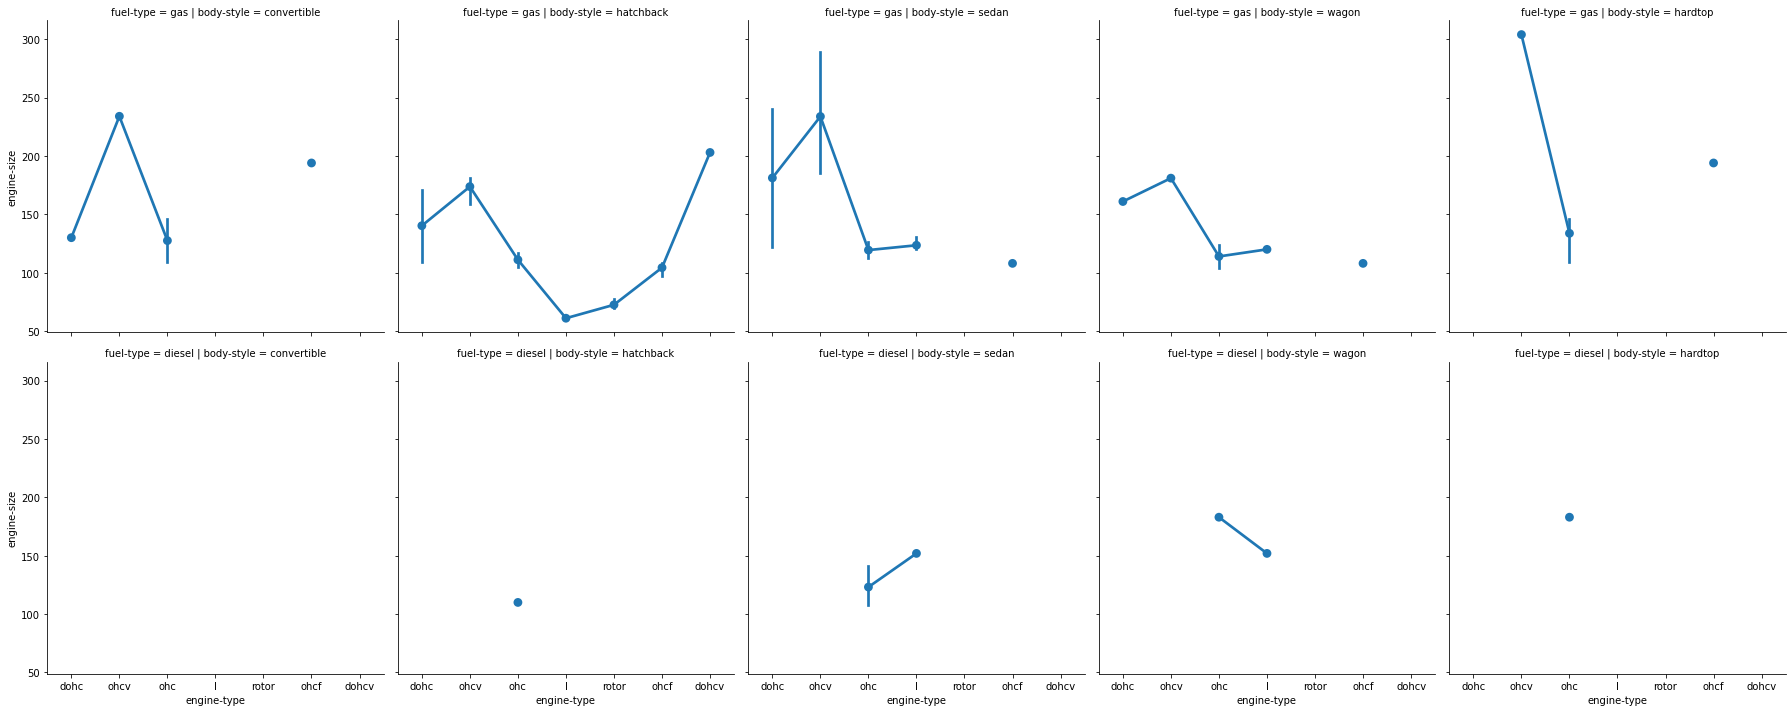

In [36]:
sns.factorplot(data=automobile_df, x="engine-type", y="engine-size", col="body-style",row="fuel-type")

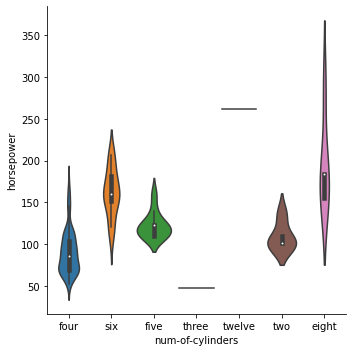

In [37]:
sns.catplot(data=automobile_df, x="num-of-cylinders", y="horsepower",kind="violin")

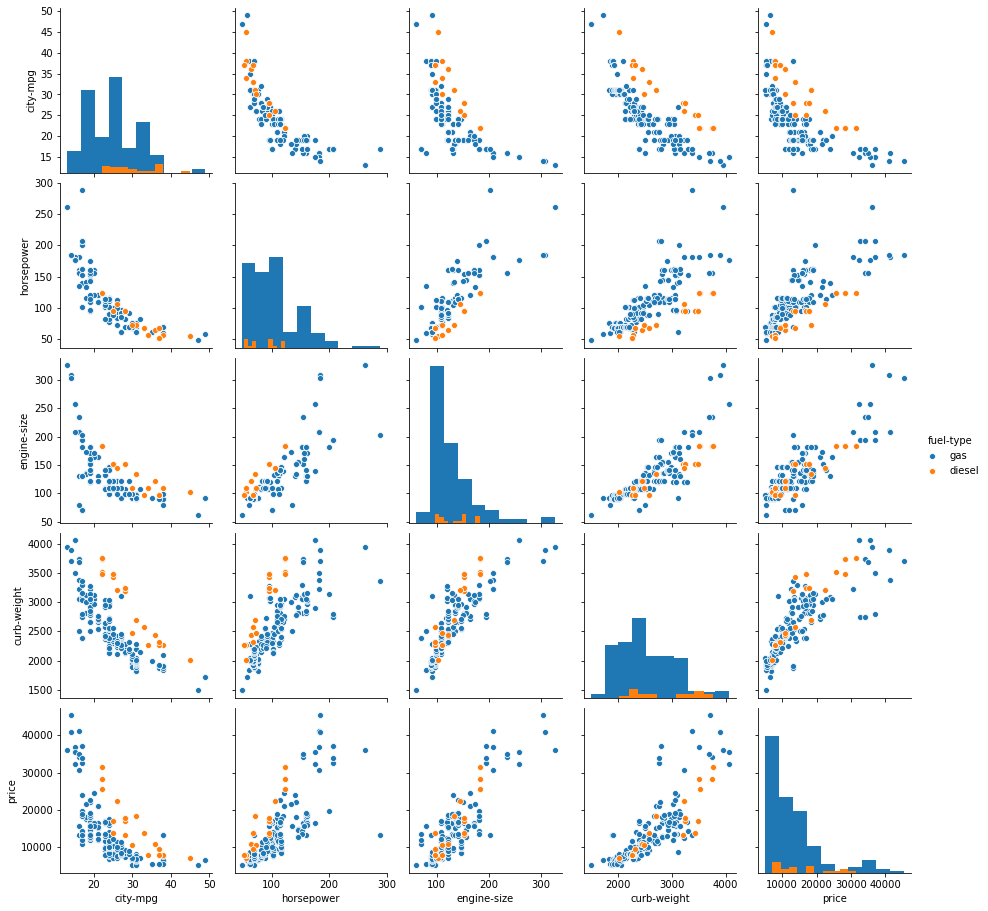

In [29]:
g = sns.pairplot(automobile_df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")